In [1]:
import requests
import pandas as pd
import json

In [2]:
# Read the CSV file with cleaned metadata (email content) related to influencer, celeb, celebrity
df = pd.read_csv('data\influencer.csv')
ids_list = df['id'].tolist()

In [3]:
print(len(ids_list))

25428


In [4]:
base_url = 'https://download.industrydocuments.ucsf.edu/'

# Loop through the document IDs and download OCR files
for ids in ids_list[:5]:
    # Download URL based on the pattern
    #https://download.industrydocuments.ucsf.edu/h/s/p/d/hspd0286/hspd0286.ocr
    url_path = f"{ids[0]}/{ids[1]}/{ids[2]}/{ids[3]}/{ids}"
    download_url = f"{base_url}{url_path}/{ids}.ocr"

    # Download the OCR file
    response = requests.get(download_url)
    if response.status_code == 200:
        # Save the OCR content to a file
        with open(f"{ids}.ocr", 'wb') as f:
            f.write(response.content)
        print(f"Downloaded OCR for document ID: {ids}")
    else:
        print(f"Failed to download OCR for document ID: {ids}, Status code: {response.status_code}")

Downloaded OCR for document ID: zzyp0299
Downloaded OCR for document ID: zzwd0296
Downloaded OCR for document ID: zzvj0283
Downloaded OCR for document ID: zzgy0284
Downloaded OCR for document ID: zzfl0287


Run the cell below to check contents of ocr file

In [6]:
# Read document's OCR text
for ids in ids_list[:2]:
    file_path = f'{ids}.ocr'
    try:
        with open(file_path, 'r') as file:
            ocr_text = file.read()
        # Print the contents of the OCR file
        print(f"Contents of {ids}.ocr:")
        print(ocr_text)
        print("\n" + "-"*80 + "\n")
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file {file_path}: {e}")

Contents of zzyp0299.ocr:
From:
To:
CC:
Sent:
Subject:

kate morgan on behalf of kate morgan <kate©pax.com>
DROP XO
La Mar Taylor; Joseph Penachio
11/30/2015 11:30:53 AM
Re: THE MADNESS FALL TOUR 2015 MERCHANDISE NOW AVAILABLE ONLINE

Thanks for the quick response.
We were expecting a post from Abel - on his social channels?. Is that in the pipeline?
KM

Kate Morgan Il.
Marketing
c,co Alabama Street. Second F€oor. San Francisco. CA 9,4110 I m 512.966.3446

This message and any files transmitted with it may contain informal:I n which is confidential or privileged. If you are not the intended recipient, please advise the sender
immediately by reply e-mail and delete this message and any ~attachments without retaining a copy thereof.

On Mon, Nov 30, 2015 at 11:26 AM, DROP XO <dropsomethin
Hi Kate — hope you had a good holiday

oc

wrote:

I can speak to the first three items on the list — I've followed up with Bravado again to see where we're at with
getting this on our webstore. I will 

In [ ]:
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import bigrams, trigrams
from collections import Counter

In [8]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

ocr_texts = {}

# Read OCR text and store it
for ids in ids_list[:5]:
    file_path = f'{ids}.ocr'
    try:
        with open(file_path, 'r') as file:
            ocr_text = file.read()
        ocr_texts[ids] = ocr_text
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"An error occurred while reading the file {file_path}: {e}")

# Preprocess each stored OCR text
for doc_id, ocr_text in ocr_texts.items():
    processed_text = preprocess_text(ocr_text)
    #print(f"Preprocessed text for {ids}:")
    #print(processed_text)
    #print("\n" + "-"*80 + "\n")

Customize stopwords 
1. Most frequent words
2. Words appearing in n% of documents

In [15]:
stop_words = set(stopwords.words('english'))
custom_stopwords = ['ucsf', 'wrote', 'confidential']
stop_words.update(custom_stopwords)

In [ ]:
stop_words = set(stopwords.words('english'))
print(stop_words)

In [10]:
# Count the frequency of each word
word_counts = Counter(processed_text.split())
most_common_words = word_counts.most_common(100)  # Get the top 10 most common words

print(most_common_words)

[('ucsf', 21), ('sarah', 16), ('formula', 16), ('richardson', 14), ('confidential', 14), ('2016', 12), ('message', 12), ('kelly', 11), ('evans', 11), ('office', 10), ('call', 8), ('please', 8), ('judgment', 8), ('pm', 8), ('pax', 8), ('pr', 7), ('agenda', 7), ('ncjliconsent', 7), ('email', 7), ('pitch', 7), ('sent', 6), ('subject', 6), ('todays', 6), ('would', 6), ('jan', 6), ('wrote', 6), ('thanks', 6), ('consumer', 6), ('technology', 6), ('havas', 6), ('twitter', 6), ('facebook', 6), ('san', 6), ('street', 6), ('second', 6), ('files', 6), ('transmitted', 6), ('may', 6), ('contain', 6), ('privileged', 6), ('intended', 6), ('recipient', 6), ('advise', 6), ('sender', 6), ('reply', 6), ('delete', 6), ('attachments', 6), ('without', 6), ('retaining', 6), ('copy', 6), ('thereof', 6), ('tara', 5), ('time', 5), ('january', 5), ('website', 5), ('work', 5), ('immediately', 5), ('information', 5), ('ashley', 4), ('cc', 4), ('paxlabs', 4), ('meeting', 4), ('mon', 4), ('cell', 4), ('22', 4), ('em

In [ ]:
!pip install wordcloud matplotlib
from wordcloud import WordCloud
import matplotlib.pyplot as plt

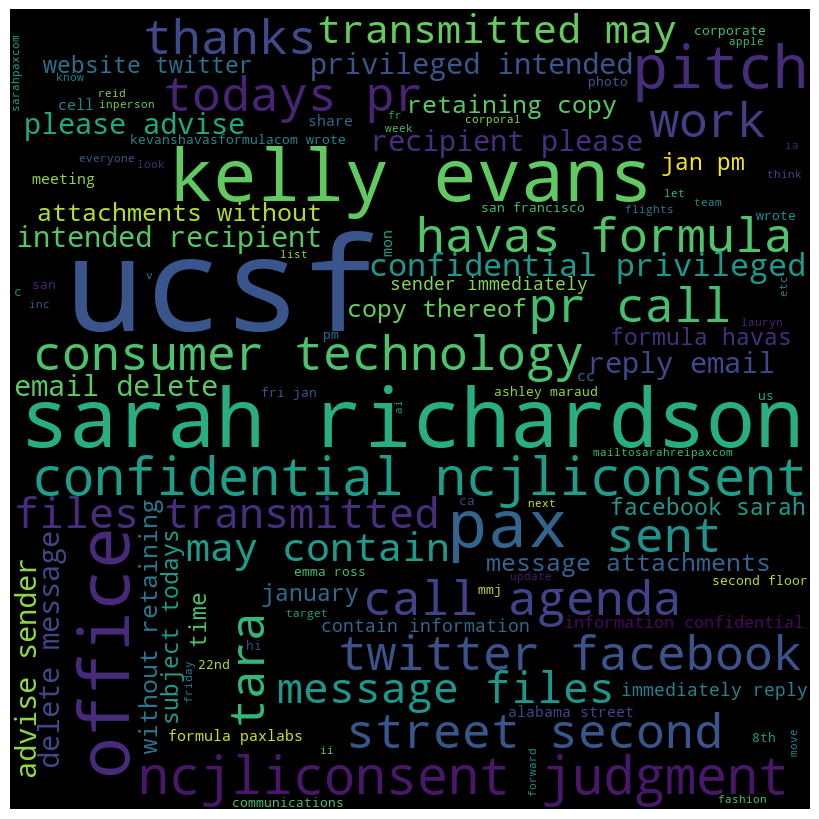

In [32]:
# Create the word cloud
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                min_font_size = 10).generate(processed_text)

# View the word cloud:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [23]:
words = word_tokenize(processed_text)

In [26]:
# Bi-grams
bi_grams = list(bigrams(words))
# Tri-grams
tri_grams = list(trigrams(words))

bi_gram_counts = Counter(bi_grams)
tri_gram_counts = Counter(tri_grams)

In [ ]:
# Print the counts
print("Bi-gram counts:")
for bi_gram, count in bi_gram_counts.items():
    print(f"{bi_gram}: {count}")

In [ ]:
print("\nTri-gram counts:")
for tri_gram, count in tri_gram_counts.items():
    print(f"{tri_gram}: {count}")

In [29]:
# Top N bi-grams
top_N_bi_grams = bi_gram_counts.most_common(50)

# Print the top 20 bi-grams
print("Top 20 Bi-grams:")
for bi_gram, count in top_N_bi_grams:
    print(f"{bi_gram}: {count}")


Top 20 Bi-grams:
('sarah', 'richardson'): 14
('kelly', 'evans'): 11
('confidential', 'ncjliconsent'): 7
('ncjliconsent', 'judgment'): 7
('todays', 'pr'): 6
('pr', 'call'): 6
('call', 'agenda'): 6
('consumer', 'technology'): 6
('havas', 'formula'): 6
('twitter', 'facebook'): 6
('street', 'second'): 6
('message', 'files'): 6
('files', 'transmitted'): 6
('transmitted', 'may'): 6
('may', 'contain'): 6
('confidential', 'privileged'): 6
('privileged', 'intended'): 6
('intended', 'recipient'): 6
('recipient', 'please'): 6
('please', 'advise'): 6
('advise', 'sender'): 6
('reply', 'email'): 6
('email', 'delete'): 6
('delete', 'message'): 6
('message', 'attachments'): 6
('attachments', 'without'): 6
('without', 'retaining'): 6
('retaining', 'copy'): 6
('copy', 'thereof'): 6
('formula', 'havas'): 5
('facebook', 'sarah'): 5
('subject', 'todays'): 5
('website', 'twitter'): 5
('ucsf', 'ucsf'): 5
('sender', 'immediately'): 5
('immediately', 'reply'): 5
('contain', 'information'): 5
('information', 'c

In [31]:
# Top N tri-grams
top_N_tri_grams = tri_gram_counts.most_common(50)

# Print the top 20 tri-grams
print("\nTop N Tri-grams:")
for tri_gram, count in top_N_tri_grams:
    print(f"{tri_gram}: {count}")


Top N Tri-grams:
('confidential', 'ncjliconsent', 'judgment'): 7
('todays', 'pr', 'call'): 6
('pr', 'call', 'agenda'): 6
('message', 'files', 'transmitted'): 6
('files', 'transmitted', 'may'): 6
('transmitted', 'may', 'contain'): 6
('confidential', 'privileged', 'intended'): 6
('privileged', 'intended', 'recipient'): 6
('intended', 'recipient', 'please'): 6
('recipient', 'please', 'advise'): 6
('please', 'advise', 'sender'): 6
('reply', 'email', 'delete'): 6
('email', 'delete', 'message'): 6
('delete', 'message', 'attachments'): 6
('message', 'attachments', 'without'): 6
('attachments', 'without', 'retaining'): 6
('without', 'retaining', 'copy'): 6
('retaining', 'copy', 'thereof'): 6
('formula', 'havas', 'formula'): 5
('twitter', 'facebook', 'sarah'): 5
('facebook', 'sarah', 'richardson'): 5
('subject', 'todays', 'pr'): 5
('website', 'twitter', 'facebook'): 5
('advise', 'sender', 'immediately'): 5
('sender', 'immediately', 'reply'): 5
('immediately', 'reply', 'email'): 5
('may', 'cont